In [1]:
import pandas as pd

# Organize column names in order
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 
        'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 
        'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

cars = pd.read_csv("imports-85.data", names = cols)

cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [2]:
# Select numberical columns as features
num_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 
            'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

cars = cars[num_cols]
cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
import numpy as np
cars = cars.replace("?", np.nan)
cars = cars.astype("float")

# Check rows with null values
cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [4]:
# Remove the rows with null values in the target column "price"
cars.dropna(subset = ["price"], inplace = True)

# Replace missing valus in the normalized-lossed column with the average
cars = cars.fillna(cars.mean())

cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [5]:
# Normalize all the columns using min-max normalization
target = cars["price"]
cars = (cars - cars.min())/(cars.max() - cars.min())
cars["price"] = target

cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


In [33]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import math

def knn_train_test(feature_col, target, data_set):
    np.random.seed(1)
    
    shuffled_index = np.random.permutation(data_set.index)
    data_set = data_set.reindex(shuffled_index)
    
    # 70% as the traning set
    div = math.floor(data_set.shape[0] * 0.7)
    train_df = data_set.iloc[0:div] 
    test_df = data_set.iloc[div:]
    
    knn = KNeighborsRegressor()
    knn.fit(train_df[[feature_col]], train_df[target])
    predictions = knn.predict(test_df[[feature_col]])
    
    # Return rmse
    mse = mean_squared_error(test_df[target], predictions)
    rmse = np.sqrt(mse)
    return rmse

feature_cols = cars.columns.drop("price")

rmse_sum = {}

for col in feature_cols:
    rmse_sum[col] = knn_train_test(col, "price", cars)
    
pd.Series(rmse_sum).sort_values(ascending = True)

city-mpg             3773.323474
horsepower           4465.724474
curb-weight          4533.329569
width                4713.578445
wheel-base           4911.734241
highway-mpg          5138.833519
length               5152.139338
compression-rate     6285.447643
stroke               6813.540394
normalized-losses    7043.386224
peak-rpm             7284.608939
height               7537.246118
bore                 7626.834927
dtype: float64

In [30]:
# Modify the function to calculate the effects of different k
def knn_train_test_k(feature_col, target, data_set):
    np.random.seed(1)
    
    shuffled_index = np.random.permutation(data_set.index)
    data_set = data_set.reindex(shuffled_index)
    
    # 70% as the traning set
    div = math.floor(data_set.shape[0] * 0.7)
    train_df = data_set.iloc[0:div] 
    test_df = data_set.iloc[div:]
    
    k_list = [1, 3, 5, 7, 9]
    rmse_k = {}
    
    for k in k_list:
        knn = KNeighborsRegressor(n_neighbors = k)
        knn.fit(train_df[[feature_col]], train_df[target])
        predictions = knn.predict(test_df[[feature_col]])
        
        # Return rmse
        mse = mean_squared_error(test_df[target], predictions)
        rmse = np.sqrt(mse)
        rmse_k[k] = rmse
    return rmse_k

rmse_k_sum = {}

for col in feature_cols:
    rmse_k_sum[col] = knn_train_test_k(col, "price", cars)
    
print(rmse_k_sum)

{'normalized-losses': {1: 7128.502473044161, 3: 6949.512431954803, 9: 7196.739747645811, 5: 7043.386223899439, 7: 6934.898614706124}, 'curb-weight': {1: 5531.952107055347, 3: 5309.186273018015, 9: 4481.842244803604, 5: 4533.329569413417, 7: 4564.82015368222}, 'wheel-base': {1: 4188.654602261827, 3: 4258.962280288243, 9: 5125.710007477294, 5: 4911.73424055456, 7: 5303.202645139683}, 'bore': {1: 11954.262611042577, 3: 8256.090409548427, 9: 7700.204310746661, 5: 7626.834926928926, 7: 7824.5521178166855}, 'height': {1: 8115.177734081843, 3: 7656.919662598661, 9: 7502.4613588207885, 5: 7537.246118389681, 7: 7843.065563258737}, 'peak-rpm': {1: 7831.70827836284, 3: 7907.850956630182, 9: 6977.755238585063, 5: 7284.608939265909, 7: 7023.553788670562}, 'highway-mpg': {1: 7760.656755628903, 3: 5259.283071679162, 9: 5153.7963925851245, 5: 5138.833519293693, 7: 5006.529960919219}, 'compression-rate': {1: 9765.654927547585, 3: 6808.24493203974, 9: 6367.099164111903, 5: 6285.447642782806, 7: 5825.993

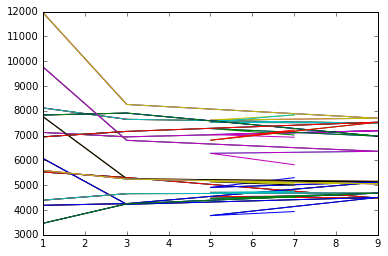

In [32]:
# Visualize the results using a line plot
%matplotlib inline
import matplotlib.pyplot as plt



for key, value in rmse_k_sum.items():
    x = []
    y = []
    for key2, value2 in value.items():
        x.append(key2)
        y.append(value2)
        plt.plot(x, y)   
plt.show()

In [34]:
# Accept multiple features
def knn_train_test_mult(feature_col, target, data_set):
    np.random.seed(1)
    
    shuffled_index = np.random.permutation(data_set.index)
    data_set = data_set.reindex(shuffled_index)
    
    # 70% as the traning set
    div = math.floor(data_set.shape[0] * 0.7)
    train_df = data_set.iloc[0:div] 
    test_df = data_set.iloc[div:]
    
    knn = KNeighborsRegressor()
    knn.fit(train_df[feature_col], train_df[target])
    predictions = knn.predict(test_df[feature_col])
    
    # Return rmse
    mse = mean_squared_error(test_df[target], predictions)
    rmse = np.sqrt(mse)
    return rmse

two_features = ["city-mpg", "horsepower"]
three_features = ["city-mpg", "horsepower", "curb-weight"]
four_features = ["city-mpg", "horsepower", "curb-weight", "width"]
five_features = ["city-mpg", "horsepower", "curb-weight", "width", "wheel-base"]

rmse_feat_sum = {}
rmse_feat_sum["two_features"] = knn_train_test_mult(two_features, "price", cars)
rmse_feat_sum["three_features"] = knn_train_test_mult(three_features, "price", cars)
rmse_feat_sum["four_features"] = knn_train_test_mult(four_features, "price", cars)
rmse_feat_sum["five_features"] = knn_train_test_mult(five_features, "price", cars)

print(rmse_feat_sum)

{'five_features': 3646.0364449677113, 'two_features': 3821.498769751616, 'four_features': 3397.1743154916358, 'three_features': 3386.876806967412}


In [ ]:
import numpy as np

# Calculate the effects of different k and accept a list of features
def knn_train_test_k_mult(feature_col, target, data_set):
    np.random.seed(1)
    
    shuffled_index = np.random.permutation(data_set.index)
    data_set = data_set.reindex(shuffled_index)
    
    # 70% as the traning set
    div = math.floor(data_set.shape[0] * 0.7)
    train_df = data_set.iloc[0:div] 
    test_df = data_set.iloc[div:]
    
    k_list = np.arange(1, 25, 1)
    rmse_k = {}
    
    for k in k_list:
        knn = KNeighborsRegressor(n_neighbors = k)
        knn.fit(train_df[feature_col], train_df[target])
        predictions = knn.predict(test_df[feature_col])
        
        # Return rmse
        mse = mean_squared_error(test_df[target], predictions)
        rmse = np.sqrt(mse)
        rmse_k[k] = rmse
    return rmse_k

rmse_k_sum_mult = {}
rmse_k_sum_mult["three"] = knn_train_test_k_mult(three_features, "price", cars)
rmse_k_sum_mult["four"] = knn_train_test_k_mult(four_features, "price", cars)
rmse_k_sum_mult["five"] = knn_train_test_k_mult(five_features, "price", cars)
    
print(rmse_k_sum)